# Intialize NMRlipids databank

In [1]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import MDAnalysis
import urllib.request
import yaml
import random


# This defines the path for the NMRlipids databank on your computer. 
# Default is that this repository and the NMRlipids databank repository are cloned to the same folder.
# If this is not the case, change this to the folder where the NMRlipids databank repository is located.
databankPath =  '../../Databank/'

# This enales the access to functions defined in the NMRlipids databank.
sys.path.insert(1, databankPath + '/Scripts/BuildDatabank/')
from databankLibrary import * 

# This initializes the databank and stores the information of all simulations into a list.
# Each list item contains the information from README.yaml file of the given simulation.
systems = initialize_databank(databankPath)

# Select random simulation for example and show its content

In [2]:
 ### To exemplify the analysis of any simulation, we select randomly one simulation ID
randomID = random.randint(1, len(systems))
print('ID of the selected simulation: ', randomID)


 ### This loops over all the simulations in the databank
for system in systems:
    
    ### To lighten up the example, we randomly select one simulation
    ### To run analyses for all simulations, comment out two lines below
    if system['ID'] != randomID:
        continue
    
    ### This prints the information about the selected simulation
    print_README(system)
 

 ### Remove comments from below two lines to see explanation on content in each simulation
#print('\n Explanation of simulation content')
#print_README('example')

ID of the selected simulation:  98
AUTHORS_CONTACT:
  Piggot, Thomas
FF_DATE:
  None
SYSTEM:
  128POPC_5120SOL_8A-switch_v2
TYPEOFSYSTEM:
  lipid bilayer
TEMPERATURE:
  303.0
PUBLICATION:
  None
NUMBER_OF_ATOMS:
  32512
EXPERIMENT:
  {'ORDERPARAMETER': {'POPC': {}}, 'FORMFACTOR': '10.1016/j.bbamem.2011.07.022/2'}
FF_SOURCE:
  None
COMPOSITION:
  {'POPC': {'NAME': 'POPC', 'COUNT': [64, 64], 'MAPPING': 'mappingPOPCcharmm.yaml'}, 'SOL': {'NAME': 'TIP3', 'COUNT': 5120, 'MAPPING': 'mappingTIP3PCHARMMgui.yaml'}}
TIMELEFTOUT:
  0
CPT:
  None
TRJLENGTH:
  500050.0
TRAJECTORY_SIZE:
  1207232304
SOFTWARE_VERSION:
  5.0.6
FF:
  CHARMM36
TOP:
  None
PREEQTIME:
  0
DOI:
  10.5281/zenodo.164206
DATEOFRUNNING:
  04/10/2021
TPR:
  [['for-md_CHARMM36_GMX506_POPC_8A-switch_from_JM_v2.tpr']]
TRJ:
  [['md_CHARMM36_GMX506_POPC_8A-switch_from_JM_v2_skip10.xtc']]
LOG:
  None
SOFTWARE:
  gromacs
DIR_WRK:
  /media/osollila/Data/tmp/DATABANK/
ID:
  98
path:
  ../../Databank//Data/Simulations/74f/eeb/74feeb08b7b

# Show analyzed properties stored in the NMRlipids databank for the selected system: 

Membrane area per lipid: 64.81466641543854 

Membrane thickness: 4.212111785888672 

Relative equilibration time for each lipid in the simulation:
POPC: 0.29754650891886714


Plot form factor and C-H bond order parameters from the simulation together with experimental data if avaible 

POPC
DOI:  10.5281/zenodo.164206
Form factor quality:  1.0220000000000007


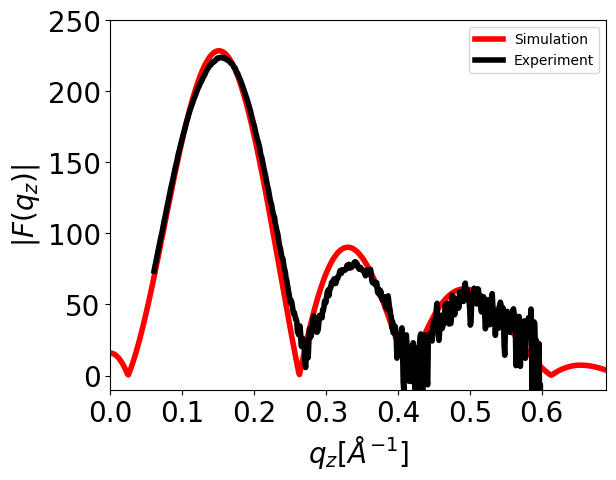

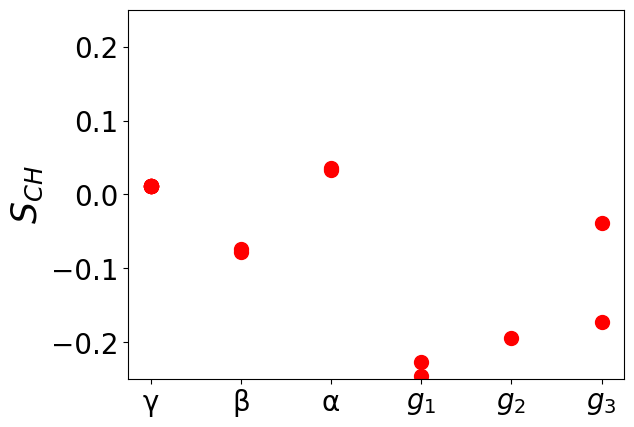

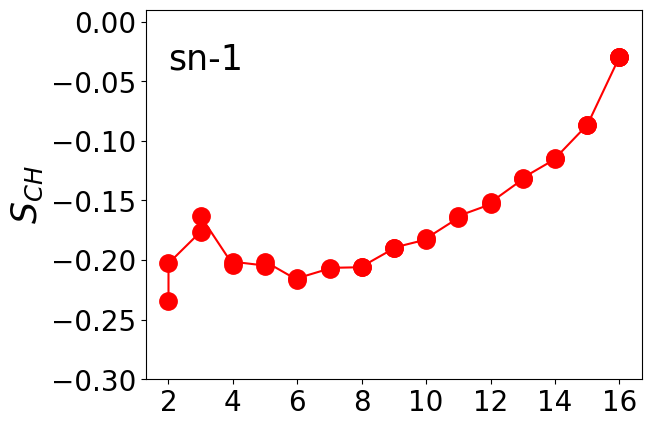

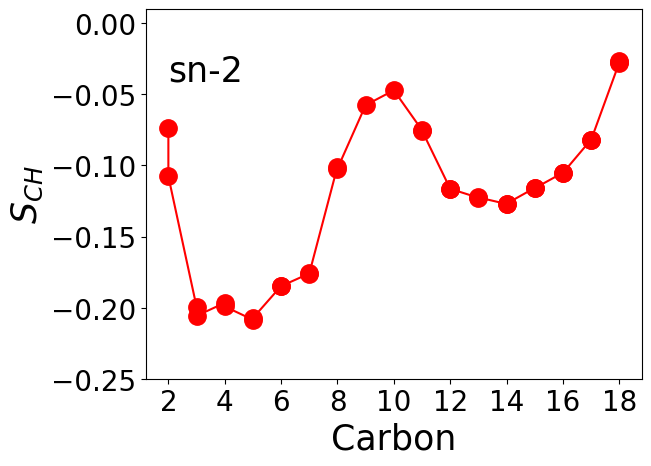

In [3]:
## Membrane area per lipid, thickness, relative equilibration time, C-H bond order parameters 
## and X-ray scattering form factors shown for the selected random simulation.

for system in systems:
    
    ### To lighten up the example, we randomly select one simulation
    ### To run analyses for all simulations, comment out two lines below
    if system['ID'] != randomID:
        continue
    
    APL = CalcAreaPerMolecule(system)
    print('Membrane area per lipid:' , APL, '\n')

    thickness = GetThickness(system)
    print('Membrane thickness:' , thickness, '\n')
    
    print('Relative equilibration time for each lipid in the simulation:')
    ShowEquilibrationTimes(system)
    print('\n')
    
    print('Plot form factor and C-H bond order parameters from the simulation together with experimental data if avaible \n')
    for lipid in system['COMPOSITION']:
        if lipid not in lipids_dict:
            continue
        print(lipid)
        plotSimulation(system['ID'], lipid)

In [20]:
IDlist = []

for system in systems:
    #print(system['COMPOSITION'].keys())
    for lipid in system['COMPOSITION']:
        if 'PG' in lipid:
            IDlist.append(system['ID'])
print('List of NMRlipids databank IDs of simulations that contain PG lipids: \n', IDlist)
    
selectedID = random.choice(IDlist)
print(selectedID)    
    
for system in systems:
    
    ### To lighten up the example, we randomly select one simulation from the list of simulations with PG
    ### To run analyses for all simulations, comment out two lines below
    if system['ID'] != selectedID:
        continue

    

List of NMRlipids databank IDs of simulations that contain PG lipids: 
 [530, 71, 180, 413, 442, 441, 286, 307, 253, 368, 503, 592, 341, 348, 220, 153, 139, 138, 302, 402, 226, 556, 538, 161, 32, 322, 170, 474, 377, 485, 447, 323, 458, 417, 217, 107, 146, 429, 58, 335, 284, 197, 49, 605, 505, 265, 230, 229, 509, 585, 182, 418, 470, 207, 568, 596, 435, 89, 404, 317, 179, 616, 363, 178]
368
